In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dic={"Age": [25,60,35,25,30,29,80,100,120,250,50,1000,2000,3000],
    "Roll_NO":[1,2,3,4,5,6,7,8,9,10,11,50,150,500],
    "Gender":["m","f","m","f","m","f","m","f","m","f","m","f","m","f"]}

In [3]:
df=pd.DataFrame(dic)

In [4]:
df

,Age,Roll_NO,Gender
0,25,1,m
1,60,2,f
2,35,3,m
3,25,4,f
4,30,5,m
5,29,6,f
6,80,7,m
7,100,8,f
8,120,9,m
9,250,10,f


In [5]:
cols = df.select_dtypes(["int64","float64"])
cols

,Age,Roll_NO
0,25,1
1,60,2
2,35,3
3,25,4
4,30,5
5,29,6
6,80,7
7,100,8
8,120,9
9,250,10


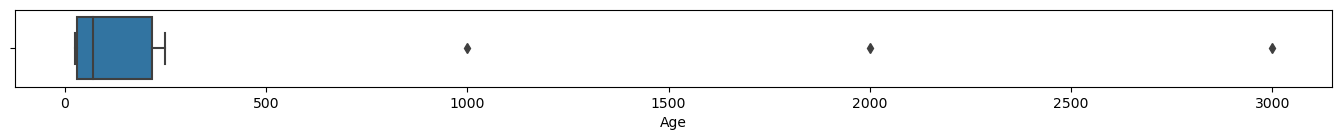

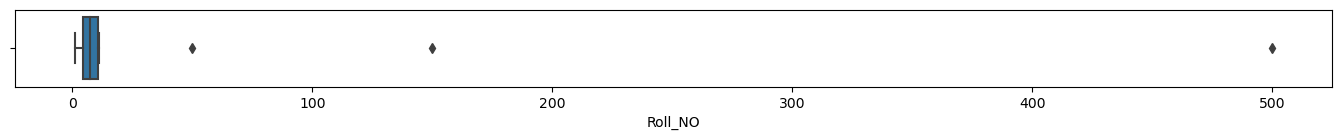

In [6]:
for column in df :
    if (((df[column].dtype)=='float64') | ((df[column].dtype)=='int64')):
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

In [7]:
## Multiple column Outlier Detection

def otlier_treat(df,columns):
    if (((df[columns].dtype)=='float64') | ((df[columns].dtype)=='int64')):
        Q1 = np.quantile(df[columns], .25) 
        Q3 = np.quantile(df[columns], .75) 
        Q2 = np.quantile(df[columns], .50)
        
        IQR = Q3-Q1
        lower_fe = Q1 -(1.5 * IQR) 
        upper_fe = Q3 +(1.5 * IQR)
    
        return Q2,lower_fe,upper_fe


for i in df.columns:
    if (((df[i].dtype)=='float64') | ((df[i].dtype)=='int64')):
        print(i,": Median: {a} , Lower_Fence: {b}, Upper_Fence: {c}".format(a=otlier_treat(df,i)[0],b=otlier_treat(df,i)[1],c=otlier_treat(df,i)[2]),"\n")
    
        

Age : Median: 70.0 , Lower_Fence: -248.125, Upper_Fence: 496.875 

Roll_NO : Median: 7.5 , Lower_Fence: -5.5, Upper_Fence: 20.5 



In [8]:
 def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)

        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)
mod_outlier(df)    

C:\Users\saran\AppData\Local\Temp\ipykernel_3068\104144510.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]


,Age,Roll_NO,Gender
0,25.000,1.0,m
1,60.000,2.0,f
2,35.000,3.0,m
3,25.000,4.0,f
4,30.000,5.0,m
5,29.000,6.0,f
6,80.000,7.0,m
7,100.000,8.0,f
8,120.000,9.0,m
9,250.000,10.0,f


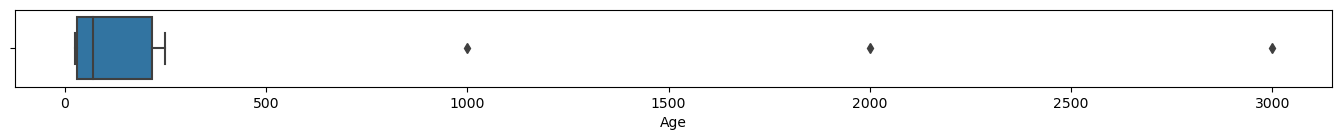

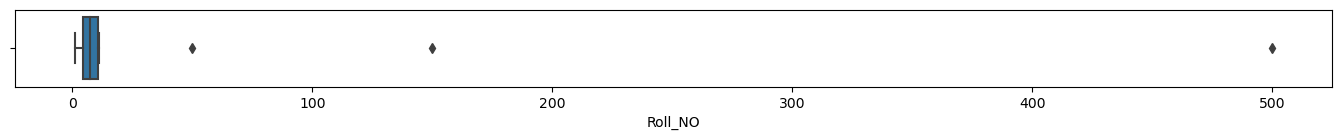

In [9]:
for column in df :
    if (((df[column].dtype)=='float64') | ((df[column].dtype)=='int64')):
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

In [10]:
## PErcentile Method

In [11]:
dic={"Age": [25,60,35,25,30,29,80,100,120,250,50,1000,2000,3000],
    "Roll_NO":[1,2,3,4,5,6,7,8,9,10,11,50,150,500],
    "Gender":["m","f","m","f","m","f","m","f","m","f","m","f","m","f"]}
data=pd.DataFrame(dic)
data

,Age,Roll_NO,Gender
0,25,1,m
1,60,2,f
2,35,3,m
3,25,4,f
4,30,5,m
5,29,6,f
6,80,7,m
7,100,8,f
8,120,9,m
9,250,10,f


In [12]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_data=cap_data(data)
final_data

C:\Users\saran\AppData\Local\Temp\ipykernel_3068\2598545089.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\saran\AppData\Local\Temp\ipykernel_3068\2598545089.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


capping the  Age
capping the  Roll_NO
capping the  Gender


,Age,Roll_NO,Gender
0,25.0,1.13,m
1,60.0,2.00,f
2,35.0,3.00,m
3,25.0,4.00,f
4,30.0,5.00,m
5,29.0,6.00,f
6,80.0,7.00,m
7,100.0,8.00,f
8,120.0,9.00,m
9,250.0,10.00,f


In [13]:
dic={"Age": [25,60,35,25,30,29,80,100,120,250,50,1000,2000,3000],
    "Roll_NO":[1,2,3,4,5,6,7,8,9,10,11,50,150,500],
    "Gender":["m","f","m","f","m","f","m","f","m","f","m","f","m","f"]}
df=pd.DataFrame(dic)
df

,Age,Roll_NO,Gender
0,25,1,m
1,60,2,f
2,35,3,m
3,25,4,f
4,30,5,m
5,29,6,f
6,80,7,m
7,100,8,f
8,120,9,m
9,250,10,f


In [14]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers





outlier_pt=detect_outliers(df["Roll_NO"])
outlier_pt


[500]

In [15]:
# calculate summary statistics
data_mean, data_std = df["Roll_NO"].mean(),df["Roll_NO"].std()


# identify outliers

cut_off = data_std * 3

lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers

outliers = [x for x in df["Roll_NO"] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))


# remove outliers
outliers_removed = [x for x in df["Roll_NO"] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Identified outliers: 1
Non-outlier observations: 13


In [16]:
from scipy import stats
def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
    
    
drop_numerical_outliers(df, z_thresh=3)
df

,Age,Roll_NO,Gender
0,25,1,m
1,60,2,f
2,35,3,m
3,25,4,f
4,30,5,m
5,29,6,f
6,80,7,m
7,100,8,f
8,120,9,m
9,250,10,f


In [17]:


def detect_out(data):
    # Computing 10th, 90th percentiles and replacing the outliers
    if (((data[column].dtype)=='float64') | ((data[column].dtype)=='int64')):
        tenth_percentile = np.percentile(data, 10)
        ninetieth_percentile = np.percentile(data, 90)
        print(tenth_percentile, ninetieth_percentile)
        b = np.where(data<tenth_percentile, tenth_percentile, data)
        b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
        print("Sample:", data)
        print("New array:",b)

In [18]:
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

# or you can create a custom list of numerical columns

df[num_col] = df[num_col].apply(lambda x: x.clip(*x.quantile([0.05, 0.95])))

In [19]:
df[num_col]

,Age,Roll_NO
0,25,1.6
1,60,2.0
2,35,3.0
3,25,4.0
4,30,5.0
5,29,6.0
6,80,7.0
7,100,8.0
8,120,9.0
9,250,10.0


In [20]:
dic={"Age": [25,60,35,25,30,29,80,100,120,250,50,1000,2000,3000],
    "Roll_NO":[1,2,3,4,5,6,7,8,9,10,11,50,150,500],
    "Gender":["m","f","m","f","m","f","m","f","m","f","m","f","m","f"]}
df=pd.DataFrame(dic)
df

,Age,Roll_NO,Gender
0,25,1,m
1,60,2,f
2,35,3,m
3,25,4,f
4,30,5,m
5,29,6,f
6,80,7,m
7,100,8,f
8,120,9,m
9,250,10,f


In [21]:
def outliertreatment(df,high_limit,low_limit):
    for i in df.columns:
        df_temp=df['y'].apply(cut,high_limit,low_limit, extra_kw=1)
    return df_temp
def cut(column,high_limit,low_limit):
    conds = [column > np.percentile(column, high_limit),
             column < np.percentile(column, low_limit)]
    choices = [np.percentile(column, high_limit),
            np.percentile(column, low_limit)]
    return np.select(conds,choices,column)  

In [22]:
outliertreatment(df,0.95,0.05)

KeyError: 'y'